## 1. K-Means clustering with real data: 실제데이터로 클러스터링

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns              #seaborn가져옴(load_dataset('iris')가져오기 위함)
import os
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')           # Turn off the warnings. 
%matplotlib inline

### 1.1. Load the 'Iris' dataset from Seaborn:

In [2]:
df = sns.load_dataset('iris')       #이거위해 seaborn가져옴

X = df.drop(columns=['species'])         #x는 4개의 수치형변수(각각의 길이,폭-열의 이름)               
Y = df['species']                        #y는 1개의 명목형변수 species (원래는 필요없지만 알고있으니 그냥 저장해둠)    
                                         #비지도학습이라 x만 필요함, 하지만 y를 알고 있으니 그냥 둠
                                         #y는 정답역할
        
header_X = X.columns                     #x의 칼럼이름 저장
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### 1.2. Apply k-means:

In [3]:
kmeans = KMeans(n_clusters=3, random_state=123)         # 군집 3개를 목표 

kmeans.fit(X)                                           # kmeans 객체만들어 x만 넣음. x는 여기서 데이터프레임(넘피배열넣어도 됨) 
                                                        # x가지고 비지도 학습
    
res = pd.Series(kmeans.labels_)                         # kmeans.labels_에 레이블 들어있고(0,1,2~) 
                                                        # 클러스팅결과를 res라는 시리즈로 저장함 

                                                        #결과는 0,1,2로 0이면 첫번째 1이면 두번째~

### 1.3. 각 레이블 별 빈도수 확인:

In [4]:
case0 = Y[res==0]  # case0은 레이블이 0인 경우임
                   # 레이블이 0인걸 Y에서 가져옴

print(case0.value_counts())  # 도수분포표 그림

# 정답은 모르지만(우린 y를 알고있지만 원래는 모름) 정석대로라면 36개, 2개가 맞는지 y정답으로 확인

virginica     36
versicolor     2
Name: species, dtype: int64


In [5]:
case1 = Y[res==1]
print(case1.value_counts())

setosa    50
Name: species, dtype: int64


In [6]:
case2 = Y[res==2]
print(case2.value_counts())

versicolor    48
virginica     14
Name: species, dtype: int64


### 1.4. 레이블 붙이기:

In [7]:
learnedLabels = ['Virginica','Setosa','Versicolor']    #우리가 직접 레이블 붙임

In [8]:
np.round(pd.DataFrame(kmeans.cluster_centers_,columns=header_X,index=['Cluster 0','Cluster 1','Cluster 2']),2)
#데이터프레임 만들 때 값으로 클러스터센터 계산, 컬럼인덱스에는 군집이름

#클러스터0은 6.85, 3.07~
#클러스터 0에 해당하는 꽃은 4개 항목 모두 다른 군집보다 큼
#클러스터 1은 꽃받힘 폭은 큰데 꽃잎폭은 제일 작음
#클러스터 2는 4개항목이 두번째로 큼 


,sepal_length,sepal_width,petal_length,petal_width
Cluster 0,6.85,3.07,5.74,2.07
Cluster 1,5.01,3.43,1.46,0.25
Cluster 2,5.90,2.75,4.39,1.43


### 1.5. Visualize: 군집 별 시각화

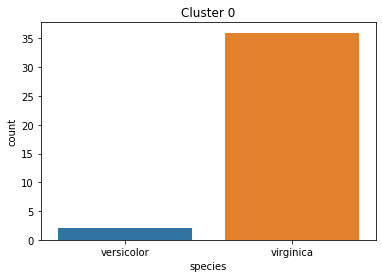

In [9]:
#클러스터 0에 대한 시각화
sns.countplot(case0).set_title('Cluster 0')
plt.show()

#대대수가 vircinca

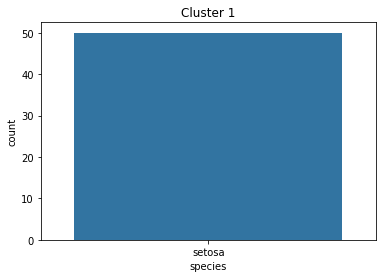

In [10]:
#클러스터 1에 대한 시각화
sns.countplot(case1).set_title('Cluster 1')
plt.show()

#100% setosa 하나유형

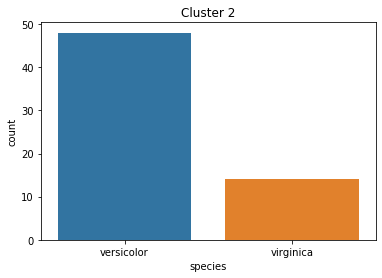

In [11]:
#클러스터 2에 대한 시각화
sns.countplot(case2).set_title('Cluster 2')
plt.show()

#대다수가 versicolor

#### 군집의 이름을 주는건 나임

#### 컴퓨터는 0,1,2,3 숫자만 정해줌

#### 결과를 눈으로 보고 해석한 뒤, 군집은 뭐다라고 이름을 지어주는건 내가 하는거임

#### 이경우는 이미 레이블이 주어진상태임

### 1.6. Prediction based on what we have learned: 학습한 결과 바탕으로 어느 군집에 들어갈지 예측하기

In [12]:
# Case 1
X_test = {'sepal_length': [7.0] ,'sepal_width': [3.0] , 'petal_length': [5.0]  ,'petal_width': [1.5] }  #x만 주어짐
#어느 관측치가 있을 때 그것에 대한 예측
#x_test로 폭은 얼마, 길이는 얼마 이런거만 주어짐
#우리가 군집화한 결과를 바탕으로 저런 치수만 주어질 때 어느 군집에 들어갈까 예측

X_test = pd.DataFrame(X_test)   #kmeans.predict로 값을 가져옴

predCluster = kmeans.predict(X_test)[0]   #라벨붙인 리스트 가져다가 예측에 적용
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

#virginica는 클러스터 0으로 예측

Predicted cluster 0 with the most probable label 'Virginica'


In [13]:
# Case 2
X_test = {'sepal_length': [4.5] ,'sepal_width': [3.0] , 'petal_length': [1.0]  ,'petal_width': [1.0] }   #x만 주어짐
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

#setosa는 클러스터1로 예측

Predicted cluster 1 with the most probable label 'Setosa'


In [14]:
# Case 3
X_test = {'sepal_length': [6.0] ,'sepal_width': [3.0] , 'petal_length': [4.0]  ,'petal_width': [1.0] }   #x만 주어짐
X_test = pd.DataFrame(X_test)
predCluster = kmeans.predict(X_test)[0]
print("Predicted cluster {} with the most probable label '{}'".format(predCluster,learnedLabels[predCluster]))

#versicolor는 클러스터2로 예측

Predicted cluster 2 with the most probable label 'Versicolor'


#### 이름을 붙여준다(이게 실무 잘하는사람)

#### 예측하고 클러스터1이에요 하는사람(실무 못하는 사람)
